In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY','CAT', 'DHR', 'RTX', 'AAPL', 'SOFI', 'DIS', 'JPM', 'WMT', 'XOM', 'COP',
           'BRK.B', 'V', 'COST', 'PG', 'UEEC.A', 'NVDA', 'HD', 'PTON', 'LUV', 'MU', 
           'MSFT', 'FB', 'NFLX', 'GSL', 'IDT', 'GBT', 
           'PTLO', 'SKIN', 'ORGN', 'TITN', 'BXC']

# Set timeframe to 1Day
timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp('2021-10-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-05-05', tz='America/New_York').isoformat()

In [5]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
ticker_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

In [6]:
# Review the first 5 rows of the Alpaca DataFrame
pd.set_option("display.max_rows", None, "display.max_columns", None)
#for i,r in ticker_data.tail(1).iterrows():
    #print(r)
#ticker_data[ticker_data['symbol']=='BRK.B'].drop('symbol', axis=1).dropna()
#ticker_data[ticker_data['symbol']=='UEEC.A'].drop('symbol', axis=1).dropna()

In [7]:
# Set drop_columns variable
drop_columns = ['open', 'symbol', 'vwap', 'volume', 'trade_count', 'high', 'low']

In [8]:
# Reorganize the DataFrame
# Separate ticker data
SPY = ticker_data[ticker_data['symbol']=='SPY'].drop(drop_columns, axis=1).dropna()
CAT = ticker_data[ticker_data['symbol']=='CAT'].drop(drop_columns, axis=1).dropna()
DHR = ticker_data[ticker_data['symbol']=='DHR'].drop(drop_columns, axis=1).dropna()
RTX = ticker_data[ticker_data['symbol']=='RTX'].drop(drop_columns, axis=1).dropna()
AAPL = ticker_data[ticker_data['symbol']=='AAPL'].drop(drop_columns, axis=1).dropna()
SOFI = ticker_data[ticker_data['symbol']=='SOFI'].drop(drop_columns, axis=1).dropna()
DIS = ticker_data[ticker_data['symbol']=='DIS'].drop(drop_columns, axis=1).dropna()
JPM = ticker_data[ticker_data['symbol']=='JPM'].drop(drop_columns, axis=1).dropna()
WMT = ticker_data[ticker_data['symbol']=='WMT'].drop(drop_columns, axis=1).dropna()
XOM = ticker_data[ticker_data['symbol']=='XOM'].drop(drop_columns, axis=1).dropna()
COP = ticker_data[ticker_data['symbol']=='COP'].drop(drop_columns, axis=1).dropna()
BRK = ticker_data[ticker_data['symbol']=='BRK.B'].drop(drop_columns, axis=1).dropna()
V = ticker_data[ticker_data['symbol']=='V'].drop(drop_columns, axis=1).dropna()
COST = ticker_data[ticker_data['symbol']=='COST'].drop(drop_columns, axis=1).dropna()
PG = ticker_data[ticker_data['symbol']=='PG'].drop(drop_columns, axis=1).dropna()
UEEC = ticker_data[ticker_data['symbol']=='UEEC'].drop(drop_columns, axis=1).dropna()
NVDA = ticker_data[ticker_data['symbol']=='NVDA'].drop(drop_columns, axis=1).dropna()
HD = ticker_data[ticker_data['symbol']=='HD'].drop(drop_columns, axis=1).dropna()
PTON = ticker_data[ticker_data['symbol']=='PTON'].drop(drop_columns, axis=1).dropna()
LUV = ticker_data[ticker_data['symbol']=='LUV'].drop(drop_columns, axis=1).dropna()
MU = ticker_data[ticker_data['symbol']=='MU'].drop(drop_columns, axis=1).dropna()
MSFT = ticker_data[ticker_data['symbol']=='MSFT'].drop(drop_columns, axis=1).dropna()
FB = ticker_data[ticker_data['symbol']=='FB'].drop(drop_columns, axis=1).dropna()
NFLX = ticker_data[ticker_data['symbol']=='NFLX'].drop(drop_columns, axis=1).dropna()
GSL = ticker_data[ticker_data['symbol']=='GSL'].drop(drop_columns, axis=1).dropna()
IDT = ticker_data[ticker_data['symbol']=='IDT'].drop(drop_columns, axis=1).dropna()
GBT = ticker_data[ticker_data['symbol']=='GBT'].drop(drop_columns, axis=1).dropna()
PTLO = ticker_data[ticker_data['symbol']=='PTLO'].drop(drop_columns, axis=1).dropna()
SKIN = ticker_data[ticker_data['symbol']=='SKIN'].drop(drop_columns, axis=1).dropna()
ORGN = ticker_data[ticker_data['symbol']=='ORGN'].drop(drop_columns, axis=1).dropna()
TITN = ticker_data[ticker_data['symbol']=='TITN'].drop(drop_columns, axis=1).dropna()
BXC = ticker_data[ticker_data['symbol']=='BXC'].drop(drop_columns, axis=1).dropna()

In [9]:
# Concatenate the ticker DataFrames
ticker_data = pd.concat([SPY,CAT, DHR, RTX, AAPL, SOFI, DIS, JPM, WMT, XOM, COP,
BRK, V, COST, PG, NVDA, HD, PTON, LUV, MU, MSFT, FB, NFLX, GSL, IDT, GBT, 
PTLO, SKIN, ORGN, TITN, BXC], axis=1, keys=['SPY','CAT', 'DHR', 'RTX', 'AAPL', 'SOFI', 'DIS', 'JPM', 'WMT', 'XOM', 'COP',
'BRK-B', 'V', 'COST', 'PG', 'NVDA', 'HD', 'PTON', 'LUV', 'MU', 'MSFT', 'FB', 'NFLX', 'GSL', 'IDT', 'GBT', 
'PTLO', 'SKIN', 'ORGN', 'TITN', 'BXC'])

In [10]:
# ticker_data.columns=['SPY','CAT', 'DHR', 'RTX', 'AAPL', 'SOFI', 'DIS', 'JPM', 'WMT', 'XOM', 'COP',
# 'BRK-B', 'V', 'COST', 'PG', 'NVDA', 'HD', 'PTON', 'LUV', 'MU', 'MSFT', 'FB', 'NFLX', 'GSL', 'IDT', 'GBT', 
# 'PTLO', 'SKIN', 'ORGN', 'TITN', 'BXC']

In [11]:
ticker_data.dropna().copy()

SPY     CAT     DHR     RTX     AAPL     SOFI  \
                            close   close   close   close    close    close   
timestamp                                                                     
2021-10-21 04:00:00+00:00  453.59  202.14  310.74   91.61  149.480  20.9900   
2021-10-22 04:00:00+00:00  453.12  200.65  313.38   91.86  148.690  20.5800   
2021-10-25 04:00:00+00:00  455.55  202.21  306.10   91.30  148.640  20.6900   
2021-10-26 04:00:00+00:00  455.96  199.64  306.93   89.16  149.320  19.9600   
2021-10-27 04:00:00+00:00  453.94  196.13  305.24   89.16  148.850  19.2500   
2021-10-28 04:00:00+00:00  458.32  204.09  304.57   89.19  152.570  19.9100   
2021-10-29 04:00:00+00:00  459.25  204.01  311.77   88.86  149.800  20.0900   
2021-11-01 04:00:00+00:00  460.04  205.38  309.68   88.55  148.960  22.6200   
2021-11-02 04:00:00+00:00  461.90  207.12  313.25   87.80  150.020  22.6800   
2021-11-03 04:00:00+00:00  464.72  203.55  310.85   88.67  151.490  22.9600   
2021-11-04 04:00:00+00:00  466.91  203.59  305.99   88.06  150.960  23.2900   
2021-11-05 04:00:00+00:00  468.53  205.88  292.08   91.18  151.280  22.5700   
2021-11-08 05:00:00+00:00  468.93  214.25  301.35   90.71  150.440  22.7400   
2021-11-09 05:00:00+00:00  467.38  209.81  299.19   90.99  150.810  22.1400   
2021-11-10 05:00:00+00:00  463.62  206.67  302.03   90.18  147.920  20.4200   
2021-11-11 05:00:00+00:00  463.77  208.53  304.54   89.05  147.870  22.9700   
2021-11-12 05:00:00+00:00  467.27  209.27  304.38   88.86  149.990  22.7600   
2021-11-15 05:00:00+00:00  467.43  207.71  299.68   89.35  150.000  22.9200   
2021-11-16 05:00:00+00:00  469.28  205.43  305.59   88.90  151.000  21.6700   
2021-11-17 05:00:00+00:00  468.14  202.98  309.67   87.45  153.490  21.1200   
2021-11-18 05:00:00+00:00  469.73  201.42  312.65   86.91  157.870  20.5700   
2021-11-19 05:00:00+00:00  468.89  200.44  314.13   85.43  160.550  20.3700   
2021-11-22 05:00:00+00:00  467.57  202.38  313.73   86.80  161.020  18.7500   
2021-11-23 05:00:00+00:00  468.19  205.33  313.52   87.31  161.410  17.8100   
2021-11-24 05:00:00+00:00  469.44  207.07  315.48   87.19  161.940  18.3300   
2021-11-26 05:00:00+00:00  458.97  198.73  323.96   83.00  156.810  18.2100   
2021-11-29 05:00:00+00:00  464.60  195.92  326.52   82.94  160.240  18.4300   
2021-11-30 05:00:00+00:00  455.56  193.35  321.64   80.92  165.300  17.2000   
2021-12-01 05:00:00+00:00  450.50  191.47  319.72   79.05  164.770  16.3900   
2021-12-02 05:00:00+00:00  457.40  196.79  316.06   81.66  163.760  16.4300   
2021-12-03 05:00:00+00:00  453.42  197.80  312.94   81.11  161.840  15.1900   
2021-12-06 05:00:00+00:00  458.79  201.28  306.90   83.76  165.320  15.7200   
2021-12-07 05:00:00+00:00  468.28  204.49  313.35   85.01  171.180  16.6200   
2021-12-08 05:00:00+00:00  469.52  204.19  318.26   86.50  175.080  16.9400   
2021-12-09 05:00:00+00:00  466.35  204.13  319.28   86.16  174.560  15.6600   
2021-12-10 05:00:00+00:00  470.74  203.46  317.49   86.16  179.450  15.0100   
2021-12-13 05:00:00+00:00  466.57  201.25  318.51   84.33  175.740  14.5800   
2021-12-14 05:00:00+00:00  463.36  201.64  307.70   83.50  174.330  14.4800   
2021-12-15 05:00:00+00:00  470.60  202.55  314.98   83.43  179.300  15.1600   
2021-12-16 05:00:00+00:00  466.45  206.17  318.49   82.70  172.260  14.2700   
2021-12-17 05:00:00+00:00  459.87  201.37  313.41   82.28  171.140  14.6500   
2021-12-20 05:00:00+00:00  454.98  195.46  314.29   81.03  169.750  14.5900   
2021-12-21 05:00:00+00:00  463.06  198.31  313.92   83.68  172.990  14.9700   
2021-12-22 05:00:00+00:00  467.69  202.15  319.68   84.07  175.640  14.9900   
2021-12-23 05:00:00+00:00  470.60  206.20  320.79   84.90  176.280  15.0900   
2021-12-27 05:00:00+00:00  477.26  206.38  327.41   85.24  180.330  15.3900   
2021-12-28 05:00:00+00:00  476.87  206.62  323.44   86.02  179.290  14.8500   
2021-12-29 05:00:00+00:00  477.48  207.33  326.58   85.89  179.380  14.4700   
2

In [12]:
ticker_data.shape

(136, 31)

In [13]:
# Prepare the data for analysis by converting values to daily returns
daily_returns = ticker_data.pct_change().dropna()

In [14]:
# Preview the data
daily_returns.head()

SPY       CAT       DHR       RTX      AAPL  \
                              close     close     close     close     close   
timestamp                                                                     
2021-10-22 04:00:00+00:00 -0.001036 -0.007371  0.008496  0.002729 -0.005285   
2021-10-25 04:00:00+00:00  0.005363  0.007775 -0.023231 -0.006096 -0.000336   
2021-10-26 04:00:00+00:00  0.000900 -0.012710  0.002712 -0.023439  0.004575   
2021-10-27 04:00:00+00:00 -0.004430 -0.017582 -0.005506  0.000000 -0.003148   
2021-10-28 04:00:00+00:00  0.009649  0.040585 -0.002195  0.000336  0.024992   

                               SOFI       DIS       JPM       WMT       XOM  \
                              close     close     close     close     close   
timestamp                                                                     
2021-10-22 04:00:00+00:00 -0.019533 -0.011206  0.013451  0.010422  0.006859   
2021-10-25 04:00:00+00:00  0.005345  0.015287 -0.004890  0.011595  0.019487   
2021-10-26 04:00:00+00:00 -0.035283  0.000174  0.002691 -0.008730  0.023155   
2021-10-27 04:00:00+00:00 -0.035571 -0.014473 -0.020828 -0.008202 -0.025972   
2021-10-28 04:00:00+00:00  0.034286  0.000767  0.015075  0.006236  0.002807   

                                COP     BRK-B         V      COST        PG  \
                              close     close     close     close     close   
timestamp                                                                     
2021-10-22 04:00:00+00:00  0.015149  0.008437  0.004300  0.009974  0.010766   
2021-10-25 04:00:00+00:00  0.010565  0.003526  0.011460  0.016826  0.000142   
2021-10-26 04:00:00+00:00  0.006665  0.002033 -0.008808 -0.009325  0.014200   
2021-10-27 04:00:00+00:00 -0.033753 -0.010555 -0.069192  0.007373 -0.007140   
2021-10-28 04:00:00+00:00  0.009674  0.006741 -0.027528  0.002903  0.005993   

                               NVDA        HD      PTON       LUV        MU  \
                              close     close     close     close     close   
timestamp                                                                     
2021-10-22 04:00:00+00:00  0.001498  0.003757 -0.010545 -0.021167 -0.016463   
2021-10-25 04:00:00+00:00  0.019361  0.014399  0.029521 -0.003149  0.018516   
2021-10-26 04:00:00+00:00  0.066952 -0.005549 -0.032505  0.002317  0.002618   
2021-10-27 04:00:00+00:00 -0.010762  0.008451 -0.053606 -0.021433 -0.010154   
2021-10-28 04:00:00+00:00  0.020040 -0.002014  0.021029  0.014387  0.019637   

                               MSFT        FB      NFLX       GSL       IDT  \
                              close     close     close     close     close   
timestamp                                                                     
2021-10-22 04:00:00+00:00 -0.005149 -0.050515  0.017790  0.002998 -0.015817   
2021-10-25 04:00:00+00:00 -0.003332  0.012569  0.010349  0.017506 -0.006978   
2021-10-26 04:00:00+00:00  0.006426 -0.039186 -0.004675 -0.028535 -0.006601   
2021-10-27 04:00:00+00:00  0.042114 -0.011368 -0.008377 -0.045356 -0.003001   
2021-10-28 04:00:00+00:00  0.003651  0.015053  0.016789  0.048869  0.011395   

                                GBT      PTLO      SKIN      ORGN      TITN  \
                              close     close     close     close     close   
timestamp                                                                     
2021-10-22 04:00:00+00:00  0.006696  0.286254 -0.006248 -0.032895 -0.012517   
2021-10-25 04:00:00+00:00 -0.022490  0.122362  0.018861  0.018707  0.020070   
2021-10-26 04:00:00+00:00 -0.027868 -0.000476 -0.010526 -0.028381 -0.039006   
2021-10-27 04:00:00+00:00  0.092667 -0.040010 -0.049523 -0.010309 -0.018678   
2021-10-28 04:00:00+00:00  0.108298 -0.074423  0.040911  0.060764  0.025256   

                                BXC  
                              close  
timestamp                            
2021-10-22 04:00:00+00:00 -0.009829  
2021-10-25 04:00:00+00:00  0.049635  
2021-10-26 04:00:00+00:00 -0.051920  
2021-1

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='timestamp'>

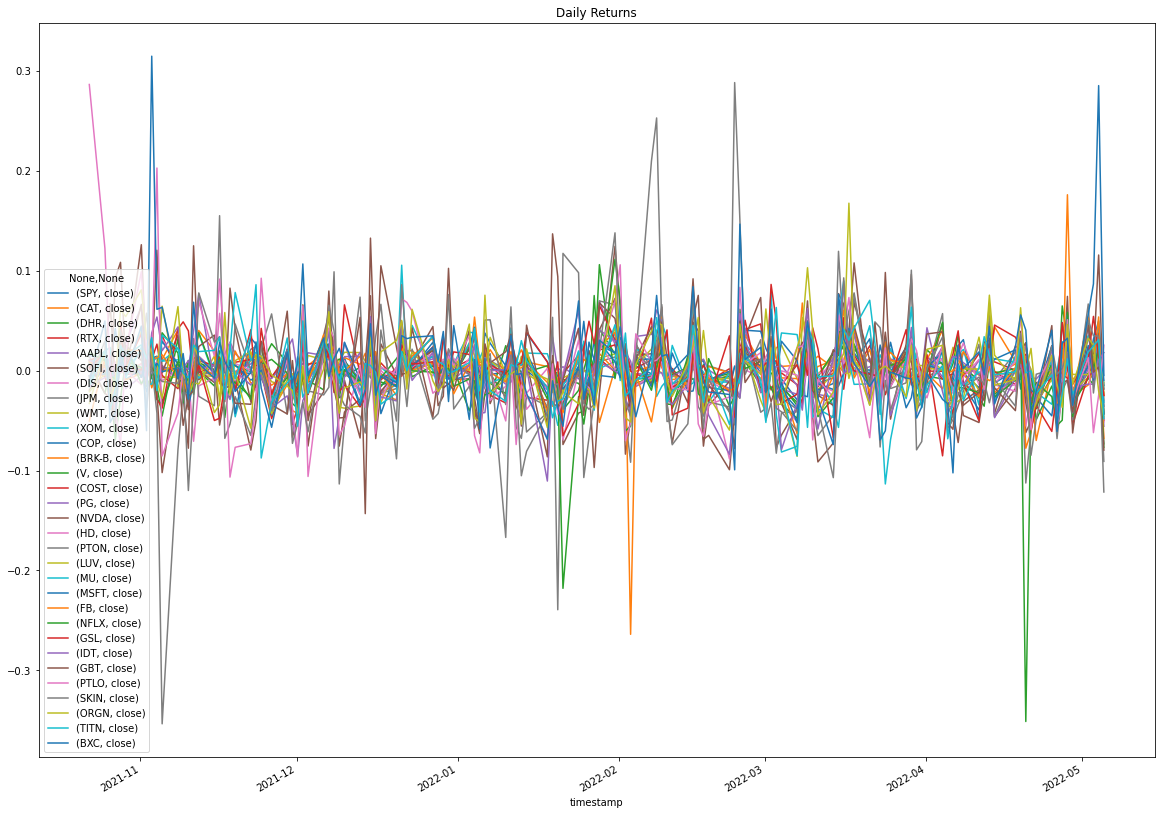

In [15]:
# Plot the daily returns of each stock vs the market proxy
daily_returns.plot(figsize=(20,15), title='Daily Returns')

In [16]:
# calculate the cumulative returns of each variable
cumulative_returns = (1 + daily_returns).cumprod()

In [17]:
# review tail of cumulative returns df
cumulative_returns.tail()

SPY       CAT       DHR       RTX      AAPL  \
                              close     close     close     close     close   
timestamp                                                                     
2022-04-29 04:00:00+00:00  0.908309  1.041555  0.808168  1.036022  1.054656   
2022-05-02 04:00:00+00:00  0.913777  1.049124  0.806205  1.028490  1.056730   
2022-05-03 04:00:00+00:00  0.917966  1.056792  0.799736  1.041371  1.066899   
2022-05-04 04:00:00+00:00  0.945920  1.101168  0.825867  1.067132  1.110650   
2022-05-05 04:00:00+00:00  0.912300  1.068220  0.810678  1.051414  1.048769   

                               SOFI       DIS       JPM       WMT       XOM  \
                              close     close     close     close     close   
timestamp                                                                     
2022-04-29 04:00:00+00:00  0.291567  0.651512  0.704189  1.042095  1.359866   
2022-05-02 04:00:00+00:00  0.301572  0.662426  0.710619  1.035216  1.378370   
2022-05-03 04:00:00+00:00  0.304907  0.662717  0.725841  1.038826  1.406763   
2022-05-04 04:00:00+00:00  0.340162  0.678125  0.749853  1.053198  1.462753   
2022-05-05 04:00:00+00:00  0.325393  0.657231  0.731091  1.040392  1.440581   

                                COP     BRK-B         V      COST        PG  \
                              close     close     close     close     close   
timestamp                                                                     
2022-04-29 04:00:00+00:00  1.280601  1.125549  0.925686  1.114180  1.152300   
2022-05-02 04:00:00+00:00  1.285963  1.109372  0.918737  1.108375  1.136726   
2022-05-03 04:00:00+00:00  1.326317  1.112161  0.905837  1.106552  1.121151   
2022-05-04 04:00:00+00:00  1.392412  1.139391  0.931723  1.140813  1.129405   
2022-05-05 04:00:00+00:00  1.379005  1.111080  0.891418  1.084006  1.108591   

                               NVDA        HD      PTON       LUV        MU  \
                              close     close     close     close     close   
timestamp                                                                     
2022-04-29 04:00:00+00:00  0.817337  0.823871  0.185173  0.960132  0.993444   
2022-05-02 04:00:00+00:00  0.860788  0.841890  0.197511  0.956227  1.028555   
2022-05-03 04:00:00+00:00  0.863829  0.836378  0.193082  0.971023  1.038170   
2022-05-04 04:00:00+00:00  0.896087  0.864763  0.197300  0.987875  1.072552   
2022-05-05 04:00:00+00:00  0.830425  0.820333  0.179374  0.965886  1.038607   

                               MSFT        FB      NFLX       GSL       IDT  \
                              close     close     close     close     close   
timestamp                                                                     
2022-04-29 04:00:00+00:00  0.893036  0.586375  0.291445  0.952463  0.551093   
2022-05-02 04:00:00+00:00  0.915401  0.617556  0.305377  0.964026  0.576275   
2022-05-03 04:00:00+00:00  0.906745  0.620188  0.306005  1.016274  0.572112   
2022-05-04 04:00:00+00:00  0.933132  0.653475  0.312343  1.030407  0.578356   
2022-05-05 04:00:00+00:00  0.892489  0.609220  0.288321  1.004711  0.588762   

                                GBT      PTLO      SKIN      ORGN      TITN  \
                              close     close     close     close     close   
timestamp                                                                     
2022-04-29 04:00:00+00:00  0.978954  0.715808  0.481441  1.067434  0.819889   
2022-05-02 04:00:00+00:00  1.023278  0.725086  0.505696  1.101974  0.835188   
2022-05-03 04:00:00+00:00  1.021684  0.680069  0.523337  1.129934  0.855702   
2022-05-04 04:00:00+00:00  1.025191  0.663230  0.541345  1.106908  0.882128   
2022-05-05 04:00:00+00:00  0.943559  0.680069  0.475560  1.055921  0.839708   

                                BXC  
                              close  
timestamp                            
2022-04-29 04:00:00+00:00  1.337412  
2022-05-02 04:00:00+00:00  1.413240  
2022-05-03 04:00:00+00:00  1.535807  
2022-0

In [18]:
# calculate the mean cumulative returns and sort the values
cumulative_returns.mean().sort_values()

PTON   close    0.383725
SOFI   close    0.630306
SKIN   close    0.716648
NFLX   close    0.725680
FB     close    0.796955
DIS    close    0.850816
IDT    close    0.856363
JPM    close    0.883947
LUV    close    0.920641
V      close    0.929227
DHR    close    0.939212
HD     close    0.976573
WMT    close    0.984748
SPY    close    0.993082
GBT    close    0.995928
MSFT   close    0.997419
RTX    close    1.011129
ORGN   close    1.031189
CAT    close    1.033941
TITN   close    1.048738
PTLO   close    1.055612
GSL    close    1.056495
BRK-B  close    1.092460
AAPL   close    1.107933
PG     close    1.110721
COST   close    1.120751
NVDA   close    1.147302
COP    close    1.155671
XOM    close    1.176159
MU     close    1.183958
BXC    close    1.534402
dtype: float64

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='timestamp'>

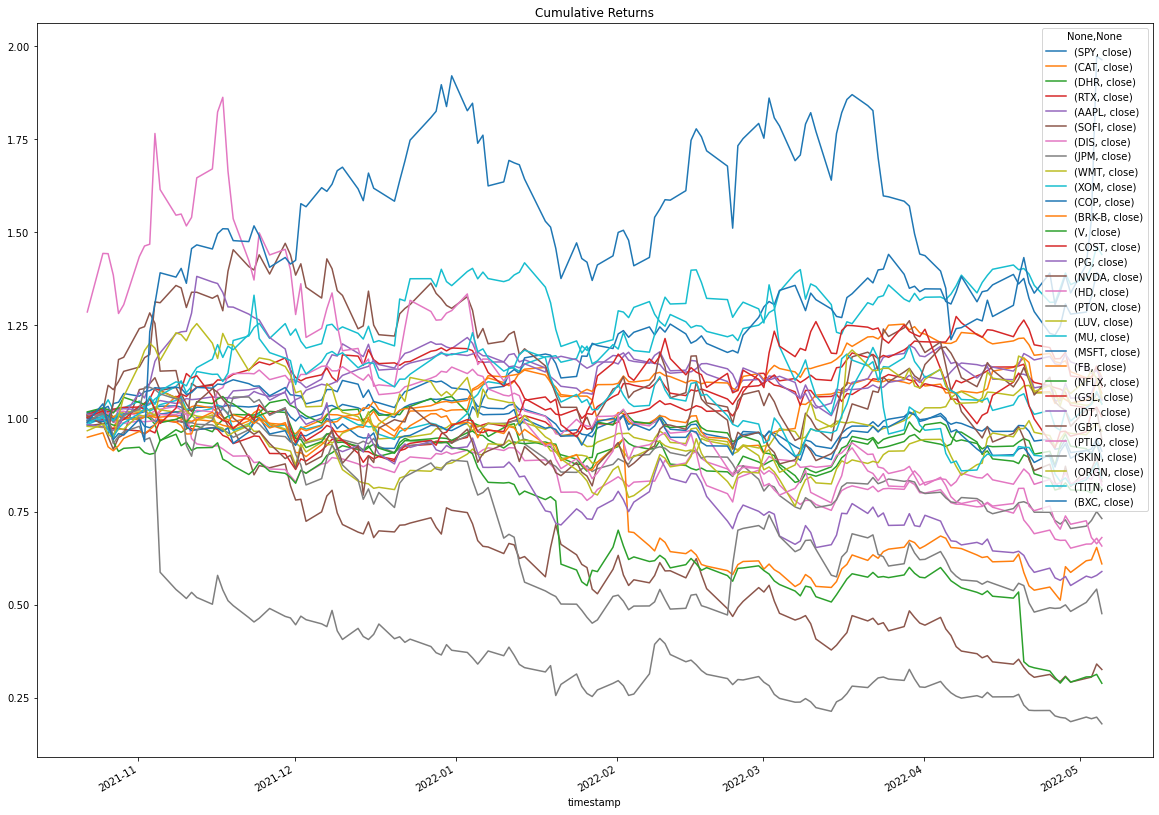

In [19]:
# Visulalize the cumulative returns
cumulative_returns.plot(figsize=(20,15), title='Cumulative Returns')

<AxesSubplot:title={'center':'Volatility'}>

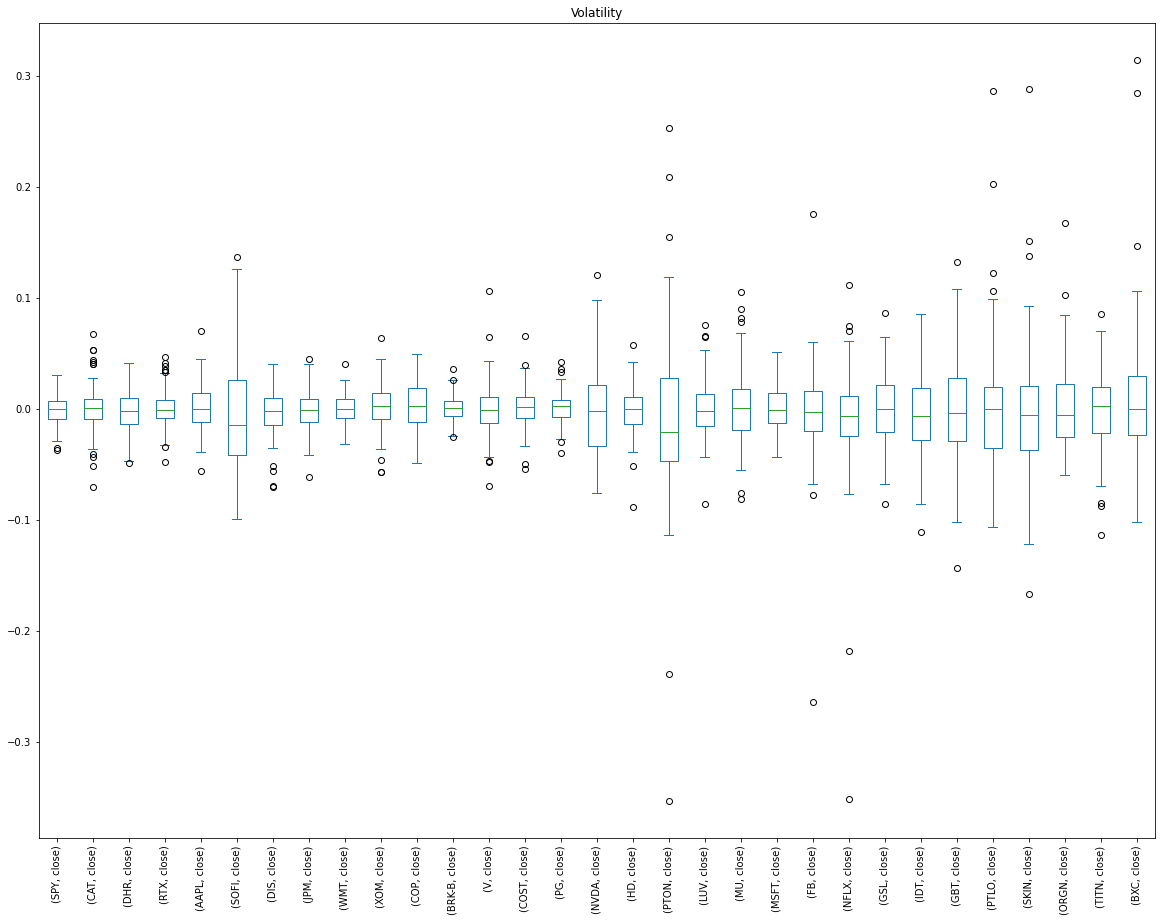

In [20]:
# use daily returns df to visualize volatility
daily_returns.plot(kind='box', figsize=(20,15), title='Volatility', rot=90)

In [21]:
# Calculate and sort the annualized standard deviation 
# Review the standard deviations sorted smallest to largest
volatility = daily_returns.std() * np.sqrt(133)
volatility.sort_values()

BRK-B  close    0.133114
WMT    close    0.138520
PG     close    0.141678
SPY    close    0.149177
RTX    close    0.177236
COST   close    0.196449
JPM    close    0.202338
DHR    close    0.214352
CAT    close    0.216649
HD     close    0.218625
DIS    close    0.221007
AAPL   close    0.221900
MSFT   close    0.229907
XOM    close    0.229916
V      close    0.255836
COP    close    0.258349
LUV    close    0.274110
MU     close    0.355587
GSL    close    0.363083
TITN   close    0.368650
IDT    close    0.402119
ORGN   close    0.436435
FB     close    0.439034
NVDA   close    0.472340
GBT    close    0.474951
NFLX   close    0.520642
SOFI   close    0.588024
SKIN   close    0.618913
PTLO   close    0.628373
BXC    close    0.628428
PTON   close    0.799806
dtype: float64

In [22]:
correlation = daily_returns.corr()
# correlation = correlation.reset_index()
# correlation = correlation.drop(columns=['level_1'])
# correlation = correlation.set_index('level_0')
correlation['CAT'].max()

close    1.0
dtype: float64

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

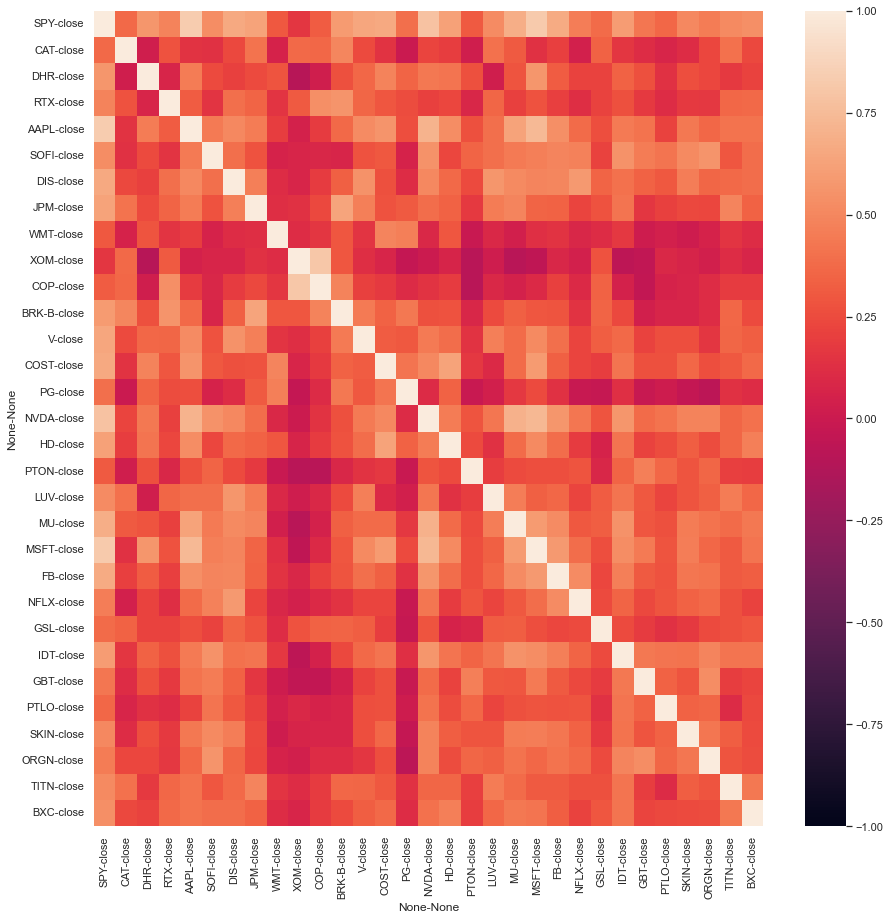

In [23]:
# calculate the correlation between returns and plot heatmap
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(correlation, vmin=-1, vmax=1)

In [24]:
# sum total correlation for each stock
correlation.mean(axis=1).sort_values()

XOM    close    0.128423
WMT    close    0.176735
PG     close    0.182217
COP    close    0.213054
PTON   close    0.226387
CAT    close    0.242065
PTLO   close    0.256443
GSL    close    0.263821
GBT    close    0.276515
DHR    close    0.286351
NFLX   close    0.287844
RTX    close    0.291490
SKIN   close    0.314737
ORGN   close    0.317203
LUV    close    0.321899
BRK-B  close    0.323391
BXC    close    0.330024
TITN   close    0.332029
HD     close    0.347021
SOFI   close    0.350265
JPM    close    0.358810
COST   close    0.360258
V      close    0.360357
FB     close    0.380633
IDT    close    0.385339
MU     close    0.391167
DIS    close    0.394601
MSFT   close    0.422094
NVDA   close    0.428952
AAPL   close    0.432505
SPY    close    0.540825
dtype: float64

In [25]:
# calculate annualized sharpe ratios
sharpe_ratios = (daily_returns.mean() * 252) / volatility
sharpe_ratios.sort_values()

NFLX   close   -3.869157
DIS    close   -3.329621
PTON   close   -3.197424
SOFI   close   -3.003194
JPM    close   -2.694936
IDT    close   -2.073970
SKIN   close   -1.669108
FB     close   -1.664367
DHR    close   -1.624071
HD     close   -1.481938
SPY    close   -1.007490
MSFT   close   -0.706737
V      close   -0.599520
PTLO   close   -0.578021
TITN   close   -0.533538
NVDA   close   -0.294130
LUV    close    0.020702
GBT    close    0.217722
GSL    close    0.366136
MU     close    0.530537
AAPL   close    0.608718
ORGN   close    0.633568
WMT    close    0.663794
RTX    close    0.694215
CAT    close    0.772349
COST   close    0.951521
PG     close    1.491891
BRK-B  close    1.602587
BXC    close    2.557803
COP    close    2.567483
XOM    close    3.184162
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

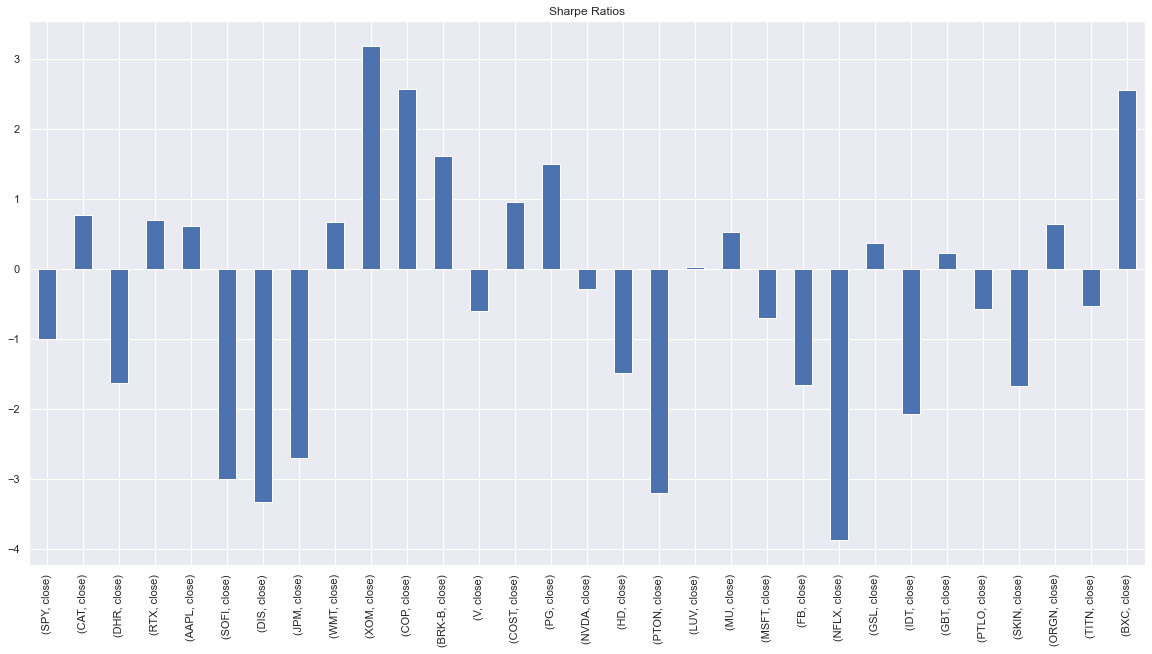

In [26]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratios.plot(kind='bar', figsize=(20,10), title='Sharpe Ratios')

In [27]:
# pos_sharpes = []
# for ratios in sharpe_ratios:
#     if ratio > 0:
#         pos_sharpes.append(ratios)
# pos_sharpes

In [28]:
# calculate daily returns of market
snp_returns = SPY.pct_change().dropna()
snp_returns

close
timestamp                          
2021-10-22 04:00:00+00:00 -0.001036
2021-10-25 04:00:00+00:00  0.005363
2021-10-26 04:00:00+00:00  0.000900
2021-10-27 04:00:00+00:00 -0.004430
2021-10-28 04:00:00+00:00  0.009649
2021-10-29 04:00:00+00:00  0.002029
2021-11-01 04:00:00+00:00  0.001720
2021-11-02 04:00:00+00:00  0.004043
2021-11-03 04:00:00+00:00  0.006105
2021-11-04 04:00:00+00:00  0.004713
2021-11-05 04:00:00+00:00  0.003470
2021-11-08 05:00:00+00:00  0.000854
2021-11-09 05:00:00+00:00 -0.003305
2021-11-10 05:00:00+00:00 -0.008045
2021-11-11 05:00:00+00:00  0.000324
2021-11-12 05:00:00+00:00  0.007547
2021-11-15 05:00:00+00:00  0.000342
2021-11-16 05:00:00+00:00  0.003958
2021-11-17 05:00:00+00:00 -0.002429
2021-11-18 05:00:00+00:00  0.003396
2021-11-19 05:00:00+00:00 -0.001788
2021-11-22 05:00:00+00:00 -0.002815
2021-11-23 05:00:00+00:00  0.001326
2021-11-24 05:00:00+00:00  0.002670
2021-11-26 05:00:00+00:00 -0.022303
2021-11-29 05:00:00+00:00  0.012267
2021-11-30 05:00:00+00:00 -0.019458
2021-12-01 05:00:00+00:00 -0.011107
2021-12-02 05:00:00+00:00  0.015316
2021-12-03 05:00:00+00:00 -0.008701
2021-12-06 05:00:00+00:00  0.011843
2021-12-07 05:00:00+00:00  0.020685
2021-12-08 05:00:00+00:00  0.002648
2021-12-09 05:00:00+00:00 -0.006752
2021-12-10 05:00:00+00:00  0.009414
2021-12-13 05:00:00+00:00 -0.008858
2021-12-14 05:00:00+00:00 -0.006880
2021-12-15 05:00:00+00:00  0.015625
2021-12-16 05:00:00+00:00 -0.008819
2021-12-17 05:00:00+00:00 -0.014107
2021-12-20 05:00:00+00:00 -0.010633
2021-12-21 05:00:00+00:00  0.017759
2021-12-22 05:00:00+00:00  0.009999
2021-12-23 05:00:00+00:00  0.006222
2021-12-27 05:00:00+00:00  0.014152
2021-12-28 05:00:00+00:00 -0.000817
2021-12-29 05:00:00+00:00  0.001279
2021-12-30 05:00:00+00:00 -0.002765
2021-12-31 05:00:00+00:00 -0.002520
2022-01-03 05:00:00+00:00  0.005790
2022-01-04 05:00:00+00:00 -0.000335
2022-01-05 05:00:00+00:00 -0.019202
2022-01-06 05:00:00+00:00 -0.000939
2022-01-07 05:00:00+00:00 -0.003953
2022-01-10 05:00:00+00:00 -0.001244
2022-01-11 05:00:00+00:00  0.009108
2022-01-12 05:00:00+00:00  0.002704
2022-01-13 05:00:00+00:00 -0.013779
2022-01-14 05:00:00+00:00  0.000409
2022-01-18 05:00:00+00:00 -0.017710
2022-01-19 05:00:00+00:00 -0.010384
2022-01-20 05:00:00+00:00 -0.011068
2022-01-21 05:00:00+00:00 -0.019631
2022-01-24 05:00:00+00:00  0.004247
2022-01-25 05:00:00+00:00 -0.012209
2022-01-26 05:00:00+00:00 -0.002509
2022-01-27 05:00:00+00:00 -0.004938
2022-01-28 05:00:00+00:00  0.024835
2022-01-31 05:00:00+00:00  0.018011
2022-02-01 05:00:00+00:00  0.006757
2022-02-02 05:00:00+00:00  0.009714
2022-02-03 05:00:00+00:00 -0.023505
2022-02-04 05:00:00+00:00  0.004702
2022-02-07 05:00:00+00:00 -0.003209
2022-02-08 05:00:00+00:00  0.008228
2022-02-09 05:00:00+00:00  0.014636
2022-02-10 05:00:00+00:00 -0.017966
2022-02-11 05:00:00+00:00 -0.019719
2022-02-14 05:00:00+00:00 -0.003269
2022-02-15 05:00:00+00:00  0.016127
2022-02-16 05:00:00+00:00  0.001121
2022-02-17 05:00:00+00:00 -0.021317
2022-02-18 05:00:00+00:00 -0.006338
2022-02-22 05:00:00+00:00 -0.010914
2022-02-23 05:00:00+00:00 -0.017459
2022-02-24 05:00:00+00:00  0.014761
2022-02-25 05:00:00+00:00  0.022064
2022-02-28 05:00:00+00:00 -0.002559
2022-03-01 05:00:00+00:00 -0.015230
2022-03-02 05:00:00+00:00  0.018396
2022-03-03 05:00:00+00:00 -0.004841
2022-03-04 05:00:00+00:00 -0.008422
2022-03-07 05:00:00+00:00 -0.029322
2022-03-08 05:00:00+00:00 -0.007582
2022-03-09 05:00:00+00:00  0.026619
2022-03-10 05:00:00+00:00 -0.004329
2022-03-11 05:00:00+00:00 -0.012715
2022-03-14 04:00:00+00:00 -0.007308
2022-03-15 04:00:00+00:00  0.021990
2022-03-16 04:00:00+00:00  0.022010
2022-03-17 04:00:00+00:00  0.012674
2022-03-18 04:00:00+00:00  0.007346
2022-03-21 04:00:00+00:00 -0.000023
2022-03-22 04:00:00+00:00  0.011906
2022-03-23 04:00:00+00:00 -0.012878
2022-03-24 04:00:00+00:00  0.015052
2022-03-25 04:00:00+00:00  0.004906
2022-03-28 04:00:00+00:00  0.006958
2022-03-29 04:00:00+00:00  0.012482
2022-03-30 04:00:00+00:00 -0.00593

In [29]:
#calculate market variance 
market_variance = snp_returns.var()
market_variance

close    0.000167
dtype: float64

In [30]:
# for stock in daily_returns:
#     beta = stock['close'].cov(snp_returns['close'])
#     return beta

In [31]:
# calculate CAT covariance 
# CAT_cov = daily_returns['CAT']['close'].cov(snp_returns['close'])
# CAT_cov

In [32]:
# cat_beta = CAT_cov / market_variance
# cat_beta

In [33]:
daily_return = daily_returns.drop(columns=['NFLX', 'SOFI', 'DIS', 'JPM', 'PTON', 'IDT', 'DHR', 
                                                 'FB', 'SKIN', 'HD', 'TITN', 'MSFT', 'V', 'PTLO',
                                                 'NVDA', 'LUV'])
ticker_data = ticker_data.drop(columns=['SPY','NFLX', 'SOFI', 'DIS', 'JPM', 'PTON', 'IDT', 'DHR', 
                                                 'FB', 'SKIN', 'HD', 'TITN', 'MSFT', 'V', 'PTLO',
                                                 'NVDA', 'LUV'])

In [34]:
ticker_data.tail()

CAT    RTX    AAPL     WMT    XOM     COP  \
                            close  close   close   close  close   close   
timestamp                                                                 
2022-04-29 04:00:00+00:00  210.54  94.91  157.65  152.99  85.25   95.52   
2022-05-02 04:00:00+00:00  212.07  94.22  157.96  151.98  86.41   95.92   
2022-05-03 04:00:00+00:00  213.62  95.40  159.48  152.51  88.19   98.93   
2022-05-04 04:00:00+00:00  222.59  97.76  166.02  154.62  91.70  103.86   
2022-05-05 04:00:00+00:00  215.93  96.32  156.77  152.74  90.31  102.86   

                            BRK-B    COST      PG     MU    GSL    GBT  ORGN  \
                            close   close   close  close  close  close close   
timestamp                                                                      
2022-04-29 04:00:00+00:00  322.83  531.72  160.55  68.19  22.24  30.70  6.49   
2022-05-02 04:00:00+00:00  318.19  528.95  158.38  70.60  22.51  32.09  6.70   
2022-05-03 04:00:00+00:00  318.99  528.08  156.21  71.26  23.73  32.04  6.87   
2022-05-04 04:00:00+00:00  326.80  544.43  157.36  73.62  24.06  32.15  6.73   
2022-05-05 04:00:00+00:00  318.68  517.32  154.46  71.29  23.46  29.59  6.42   

                             BXC  
                           close  
timestamp                         
2022-04-29 04:00:00+00:00  66.67  
2022-05-02 04:00:00+00:00  70.45  
2022-05-03 04:00:00+00:00  76.56  
2022-05-04 04:00:00+00:00  98.39  
2022-05-05 04:00:00+00:00  97.91

In [35]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
one_year_simulation = MCSimulation(
    portfolio_data=ticker_data,
    weights=[0.714, 0.714, 0.714, 0.714, 0.714, 0.714, 0.714, 0.714, 0.714, 0.714, 0.714,
            0.714, 0.714, 0.714],
    num_simulation=num_sims,
    num_trading_days=252*1
)

In [36]:
# Run Monte Carlo simulations to forecast three years daily returns
one_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/matthewfield/Desktop/FinTech-Workspace/Diversifying_Stock_Portfolio/My_Portfolio/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

0          1          2          3         4          5    \
0     1.000000   1.000000   1.000000   1.000000  1.000000   1.000000   
1     0.888428   0.979334   1.070240   1.100493  1.063853   1.160942   
2     0.901457   0.899497   0.998255   1.079119  1.004971   1.249463   
3     0.909337   0.941597   0.903361   1.076516  1.004271   1.237011   
4     0.949591   0.840929   0.888278   1.042173  1.041631   1.177650   
5     0.927897   0.985129   0.739334   1.035289  1.122536   1.214744   
6     0.974437   1.049231   0.715088   1.091672  1.154812   1.005597   
7     0.979037   1.249194   0.744460   1.184896  1.158578   0.864175   
8     0.992554   1.144088   0.767097   1.174125  1.170177   0.943252   
9     1.170281   1.129034   0.721922   1.047603  1.276810   0.848812   
10    1.324878   1.236667   0.787047   1.126587  1.224949   0.807069   
11    1.482946   1.328972   0.839937   1.255460  1.234563   0.842927   
12    1.509175   1.339437   0.961255   1.256188  1.202180   0.831088   
13    1.382188   1.498615   0.920007   1.185206  1.247919   0.746066   
14    1.298775   1.543348   1.006068   1.153607  1.220046   0.745217   
15    1.265307   1.487561   1.016734   0.936626  1.127505   0.831790   
16    1.246817   1.618435   1.018954   0.903817  1.139168   0.817659   
17    1.179167   1.550878   1.019779   0.953304  1.004164   0.759573   
18    1.251308   1.570696   1.038324   0.916575  1.020768   0.721548   
19    1.298042   1.534261   0.996817   1.163107  1.147473   0.735149   
20    1.280917   1.613276   0.935000   0.904633  1.356085   0.759530   
21    1.234312   1.780219   1.023188   0.924803  1.337509   0.748674   
22    1.135170   1.688570   1.044756   0.928968  1.358924   0.728404   
23    1.106976   1.504106   0.935301   0.893506  1.133923   0.702582   
24    1.218578   1.672784   0.964602   0.860459  1.100614   0.774648   
25    1.259454   1.676482   0.931095   0.719336  1.080537   0.840654   
26    1.330423   1.586256   1.067737   0.653010  0.949367   0.855578   
27    1.299630   1.390912   0.992948   0.633617  0.889639   0.786712   
28    1.350353   1.548079   0.958337   0.674134  0.988689   0.846021   
29    1.326768   1.436116   0.914007   0.668902  0.893762   0.869494   
30    1.286641   1.517858   0.954276   0.712739  0.851002   0.896693   
31    1.379080   1.563888   1.005370   0.682958  0.782311   0.913489   
32    1.392773   1.496789   1.130350   0.628550  0.721849   0.831155   
33    1.563959   1.611074   1.061100   0.609191  0.702522   0.921019   
34    1.819102   1.617216   1.060829   0.694506  0.781375   0.875333   
35    1.948303   1.640561   1.048214   0.773199  0.809738   0.925124   
36    2.017461   1.529912   1.063295   0.819446  0.872308   0.892723   
37    1.831770   1.552104   1.127911   0.851253  0.781522   0.869206   
38    1.831968   1.775014   1.163960   0.998176  0.807075   0.729269   
39    1.559176   1.754815   1.025920   1.046162  0.767553   0.802413   
40    1.800459   1.746428   1.098823   1.121915  0.753157   0.787509   
41    1.960375   1.748865   1.163063   1.072499  0.666454   0.744413   
42    1.930220   1.753181   1.150151   1.102792  0.682814   0.659359   
43    1.897023   1.770464   1.152540   1.144393  0.714433   0.661842   
44    1.872807   1.817191   1.289954   1.096586  0.738228   0.648233   
45    1.868569   1.881055   1.296355   1.162435  0.788957   0.593286   
46    2.083295   1.660509   1.412524   1.202877  0.798647   0.584044   
47    2.093385   1.510110   1.478231   1.300726  0.792699   0.573081   
48    2.301033   1.502183   1.414644   1.387935  0.815523   0.486797   
49    2.090171   1.562615   1.428595   1.415413  0.920007   0.490327   
50    1.962244   1.667399   1.409737   1.366936  0.980651   0.501973   
51    1.936527   1.649559   1.402210   1.524329  1.004703   0.577167   
52    1.986299   1.434045   1.478440   1.497200  1.026997   0.605839   
53    2.029760   1.342895   1.422355   1.533604  0.946679   0.599122   
54    2.279110   1.300546   1.461830   1.724937  1.

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

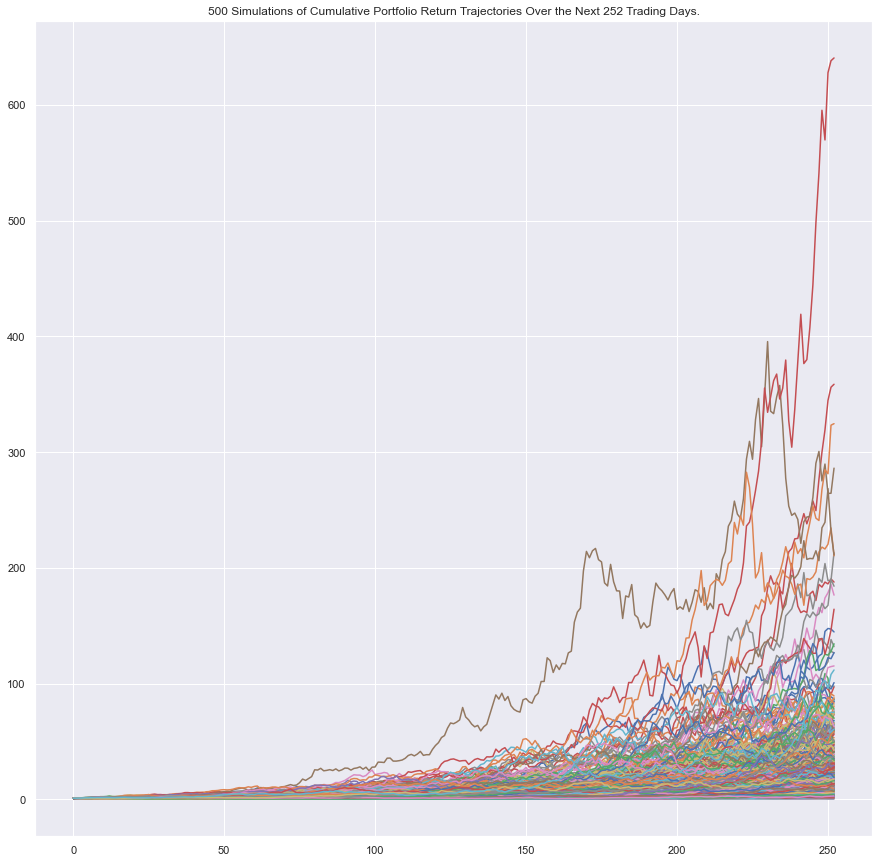

In [37]:
one_year_simulation.plot_simulation()

In [38]:
# Generate summary statistics from the Monte Carlo simulation results
# Save the results as a variable
summary_stats = one_year_simulation.summarize_cumulative_return()
summary_stats

count           500.000000
mean             29.630768
std              47.392294
min               0.623895
25%               7.896148
50%              16.759003
75%              33.630561
max             640.600995
95% CI Lower      1.475305
95% CI Upper    133.319482
Name: 252, dtype: float64

In [39]:
# Set the values of the initial investment
initial = 14000

In [40]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_one_cumulative_return = round(summary_stats[8]*initial,2)
ci_upper_one_cumulative_return = round(summary_stats[9]*initial,2)
mean_return = round(summary_stats[1]*initial,2) 

In [43]:
# Print the result of your calculations
print(f"There is a 95% chance that the stock portfolio"
      f" over the next year will end within the range of"
      f" ${ci_lower_one_cumulative_return} and ${ci_upper_one_cumulative_return}.")

There is a 95% chance that the stock portfolio over the next year will end within the range of $20654.27 and $1866472.75.


In [42]:
# Print the mean return
print(f"The mean one year simulated return would put the portfolio value at ${mean_return}.")

The mean one year simulated return would put the portfolio value at $414830.76.
